## EDA

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px

data = pd.read_csv('train.csv')
data.head()

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64        NaN   
1                       -1         0.999896    1642214.25        NaN   
2                       -1         0.999561    1819368.03        NaN   
3                       -1         1.000171   18389745.62        NaN   
4                       -1         0.999532   17860614.95        NaN   

   near_price  bid_price  bid_size  ask_price   ask_size  wap    target  \
0         NaN   0.999812  60651.50   1.000026    8493.03  1.0 -3.029704   
1         NaN   0.999896   3233.04   1.000660   20605.09  1.0 -5.519986   
2         NaN   0.999403  37956.00   1.000298   18995.00  1.0 -8.389950   
3         NaN   0.999999   2324.90   1.000214  479032.40  1.0 -4.010200   
4         NaN   0.999394  16485.54   1.000016     434.10  1.0 -7.349849   

   time_id row_id  
0        0  0_0_0  
1        0  0_0_1  
2        0  0_0_2  
3        0  0_0_3  
4        0  0_0_4

In [2]:
basic_info = data.info()
statistics = data.describe()

basic_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [3]:
statistics

stock_id       date_id  seconds_in_bucket  imbalance_size  \
count  5.237980e+06  5.237980e+06       5.237980e+06    5.237760e+06   
mean   9.928856e+01  2.415100e+02       2.700000e+02    5.715293e+06   
std    5.787176e+01  1.385319e+02       1.587451e+02    2.051591e+07   
min    0.000000e+00  0.000000e+00       0.000000e+00    0.000000e+00   
25%    4.900000e+01  1.220000e+02       1.300000e+02    8.453415e+04   
50%    9.900000e+01  2.420000e+02       2.700000e+02    1.113604e+06   
75%    1.490000e+02  3.610000e+02       4.100000e+02    4.190951e+06   
max    1.990000e+02  4.800000e+02       5.400000e+02    2.982028e+09   

       imbalance_buy_sell_flag  reference_price  matched_size     far_price  \
count             5.237980e+06     5.237760e+06  5.237760e+06  2.343638e+06   
mean             -1.189619e-02     9.999955e-01  4.510025e+07  1.001713e+00   
std               8.853374e-01     2.532497e-03  1.398413e+08  7.214705e-01   
min              -1.000000e+00     9.352850e-01  4.316610e+03  7.700000e-05   
25%              -1.000000e+00     9.987630e-01  5.279575e+06  9.963320e-01   
50%               0.000000e+00     9.999670e-01  1.288264e+07  9.998830e-01   
75%               1.000000e+00     1.001174e+00  3.270013e+07  1.003318e+00   
max               1.000000e+00     1.077488e+00  7.713682e+09  4.379531e+02   

         near_price     bid_price      bid_size     ask_price      ask_size  \
count  2.380800e+06  5.237760e+06  5.237980e+06  5.237760e+06  5.237980e+06   
mean   9.996601e-01  9.997263e-01  5.181359e+04  1.000264e+00  5.357568e+04   
std    1.216920e-02  2.499345e-03  1.114214e+05  2.510042e-03  1.293554e+05   
min    7.869880e-01  9.349150e-01  0.000000e+00  9.398270e-01  0.000000e+00   
25%    9.971000e-01  9.985290e-01  7.374720e+03  9.990290e-01  7.823700e+03   
50%    9.998890e-01  9.997280e-01  2.196900e+04  1.000207e+00  2.301792e+04   
75%    1.002590e+00  1.000905e+00  5.583168e+04  1.001414e+00  5.787841e+04   
max    1.309732e+00  1.077488e+00  3.028784e+07  1.077836e+00  5.440500e+07   

                wap        target       time_id  
count  5.237760e+06  5.237892e+06  5.237980e+06  
mean   9.999920e-01 -4.756125e-02  1.331005e+04  
std    2.497509e-03  9.452860e+00  7.619271e+03  
min    9.380080e-01 -3.852898e+02  0.000000e+00  
25%    9.987810e-01 -4.559755e+00  6.729000e+03  
50%    9.999970e-01 -6.020069e-02  1.334500e+04  
75%    1.001149e+00  4.409552e+00  1.990700e+04  
max    1.077675e+00  4.460704e+02  2.645400e+04

In [4]:
import plotly.graph_objects as go


#Use stock_id 0 for sample data visualization
stock_id_0_df = data[data['stock_id'] == 0].head(1000) 
stock_id_0_df

#Visualizes the Weighted Average Price (WAP), ask price, and bid price for stock_id 0
def plot_wap(df, stock_id):
    # Filter the data for the given stock_id
    stock_data = df[df['stock_id'] == stock_id]

    # Create the figure
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=stock_data['time_id'], 
                   y=stock_data['wap'], 
                   name='WAP',
                   line=dict(color='black'))
    )

    fig.add_trace(
        go.Scatter(x=stock_data['time_id'], 
                   y=stock_data['ask_price'], 
                   name='ask price',
                   line=dict(color='blue'))
    )

    fig.add_trace(
        go.Scatter(x=stock_data['time_id'], 
                   y=stock_data['bid_price'], 
                   name='bid price',
                   line=dict(color='green'))
    )

    # Update the layout
    fig.update_layout(title="Overview for WAP and ask/bid price",
                      title_font=dict(size=15),
                      showlegend=True,
                      width=1000,
                      height=400,
                      margin=dict(l=40, r=40, t=40, b=20))
    
    # Display the figure
    fig.show()

# Sample usage:
plot_wap(df=stock_id_0_df, stock_id=0)

In [5]:
#Compare and visualize both the Target variable and the WAP (Weighted Average Price) 
import plotly.graph_objects as go

def plot_wap_and_target(stock_df):
    # Create a new figure
    fig = go.Figure()

    # Add a trace for the Target variable
    fig.add_trace(
        go.Scatter(x=stock_df['time_id'], 
                   y=stock_df['target'], 
                   name='Target variable',
                   line=dict(color='blue'),
                   yaxis='y2')
    )

    # Add a trace for the WAP (Weighted Average Price)
    fig.add_trace(
        go.Scatter(x=stock_df['time_id'], 
                   y=stock_df['wap'], 
                   name='WAP',
                   line=dict(color='green'))
    )

    # Update the layout and appearance of the plot
    fig.update_layout(
        title="Overview for WAP and Target Variable",
        title_font=dict(size=15),
        showlegend=True,
        width=1000,
        height=400,
        margin=dict(l=40, r=40, t=40, b=20),
        yaxis2=dict(title="Target Variable", overlaying="y", side="right")
    )

    # Display the figure
    fig.show()

plot_wap_and_target(stock_id_0_df)

In [6]:
fig = go.Figure()


fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'], 
            y = stock_id_0_df['reference_price'], 
            name = 'reference price',
            line = dict(color = 'blue')))

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'], 
            y = stock_id_0_df['wap'], 
            name = 'WAP',
            line = dict(color = 'green')))

fig.update_layout(title = "Overview for Reference Price and WAP",
                yaxis2 = dict(title = "Target Variable", overlaying = "y", side = "right"),
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 40, r = 40, t = 40, b = 20))

Reference Price and WAP are highly correlated.

In [7]:
fig = go.Figure()


fig.add_trace(
    go.Scatter(x = stock_id_0_df[stock_id_0_df['date_id']==0]['seconds_in_bucket'], 
            y = stock_id_0_df[stock_id_0_df['date_id']==0]['wap'], 
            name = 'wap',
            line = dict(color = 'blue')))

fig.add_trace(
    go.Scatter(x = stock_id_0_df[stock_id_0_df['date_id']==0]['seconds_in_bucket'], 
               y = stock_id_0_df[stock_id_0_df['date_id']==0]['near_price'], 
               name = 'near price',
               line = dict(color = 'orange'),
               yaxis = "y2"))

fig.add_trace(
    go.Scatter(x = stock_id_0_df[stock_id_0_df['date_id']==0]['seconds_in_bucket'], 
               y = stock_id_0_df[stock_id_0_df['date_id']==0]['far_price'], 
               name = 'far price',
               line = dict(color = 'red'),
               yaxis = "y2"))

fig.update_layout(title = "Overview for Reference Price and Near Price in a Single Date",
                yaxis2 = dict(title = "Near Price/Far Price", overlaying = "y", side = "right"),
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 20, r = 40, t = 40, b = 20))

In [8]:
import plotly.graph_objects as go

def visualize_order_book(stock_df):
    # 1. Plotting wap, ask_price, and bid_price
    fig1 = go.Figure()

    fig1.add_trace(go.Scatter(x=stock_df['time_id'], y=stock_df['wap'], name='WAP', line=dict(color='black')))
    fig1.add_trace(go.Scatter(x=stock_df['time_id'], y=stock_df['ask_price'], name='Ask Price', line=dict(color='blue')))
    fig1.add_trace(go.Scatter(x=stock_df['time_id'], y=stock_df['bid_price'], name='Bid Price', line=dict(color='green')))

    fig1.update_layout(title='WAP, Ask Price, and Bid Price over Time',
                       xaxis_title='Time ID',
                       yaxis_title='Price',
                       width=1000,
                       height=400)

    fig1.show()

    # 2. Plotting ask_size and bid_size
    fig2 = go.Figure()

    fig2.add_trace(go.Scatter(x=stock_df['time_id'], y=stock_df['ask_size'], name='Ask Size', line=dict(color='blue')))
    fig2.add_trace(go.Scatter(x=stock_df['time_id'], y=stock_df['bid_size'], name='Bid Size', line=dict(color='green')))

    fig2.update_layout(title='Ask Size and Bid Size over Time',
                       xaxis_title='Time ID',
                       yaxis_title='Size',
                       width=1000,
                       height=400)

    fig2.show()

    # 3. Plotting imbalance_size and imbalance_buy_sell_flag
    fig3 = go.Figure()

    fig3.add_trace(go.Scatter(x=stock_df['time_id'], y=stock_df['imbalance_size'], name='Imbalance Size', line=dict(color='red')))

    fig3.update_layout(title='Imbalance Size over Time',
                       xaxis_title='Time ID',
                       yaxis_title='Imbalance Size',
                       width=1000,
                       height=400)

    fig3.show()

# Sample usage:
visualize_order_book(stock_id_0_df)

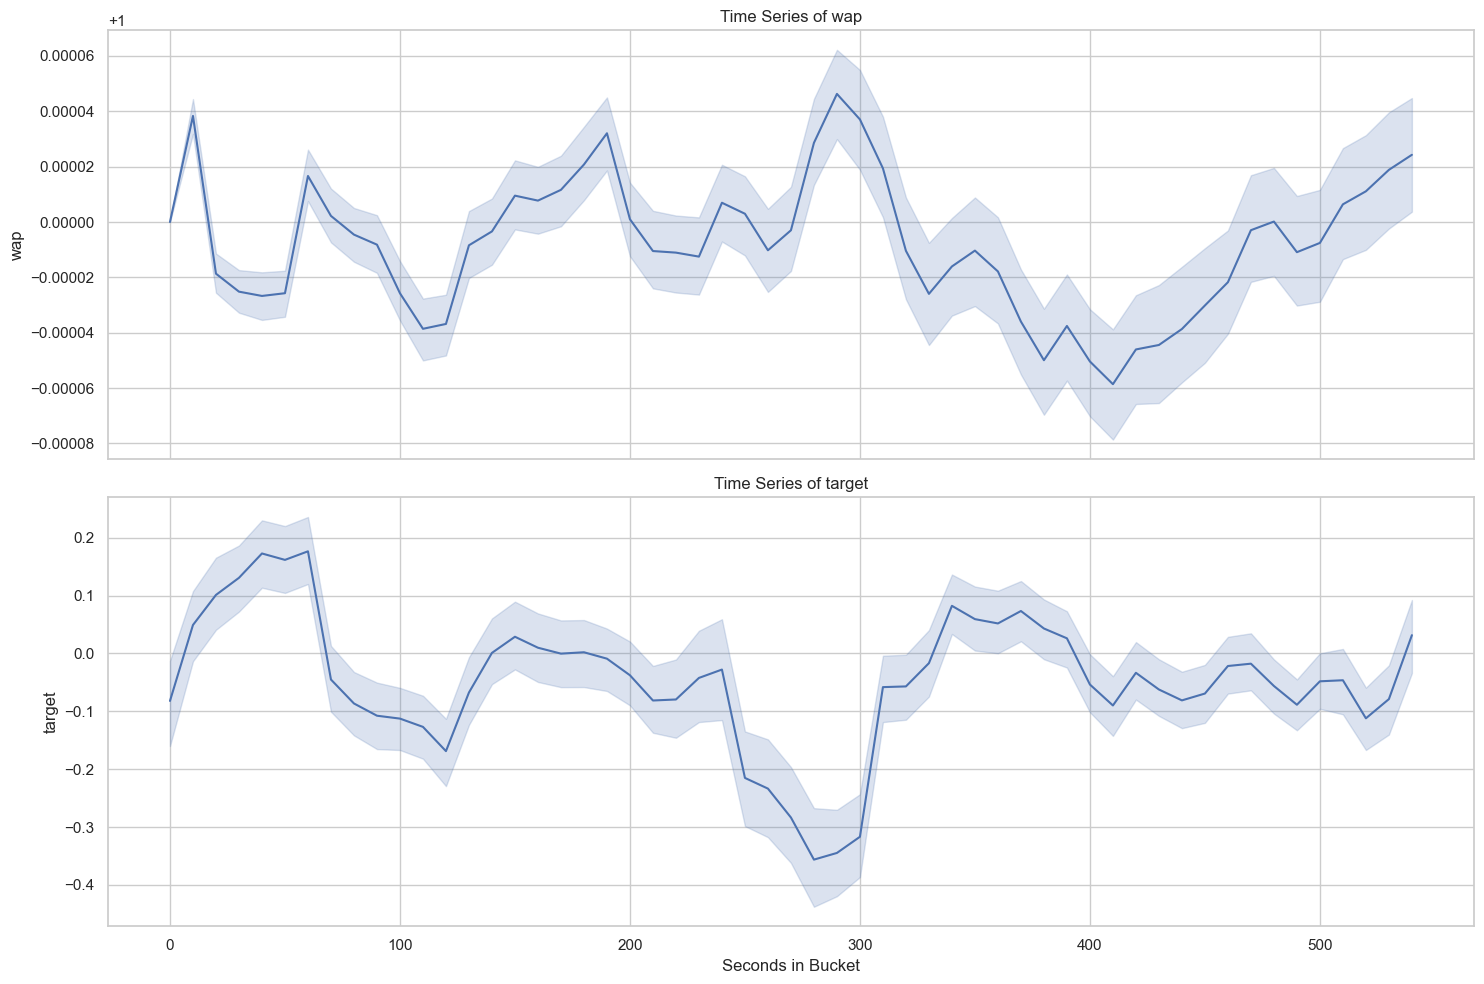

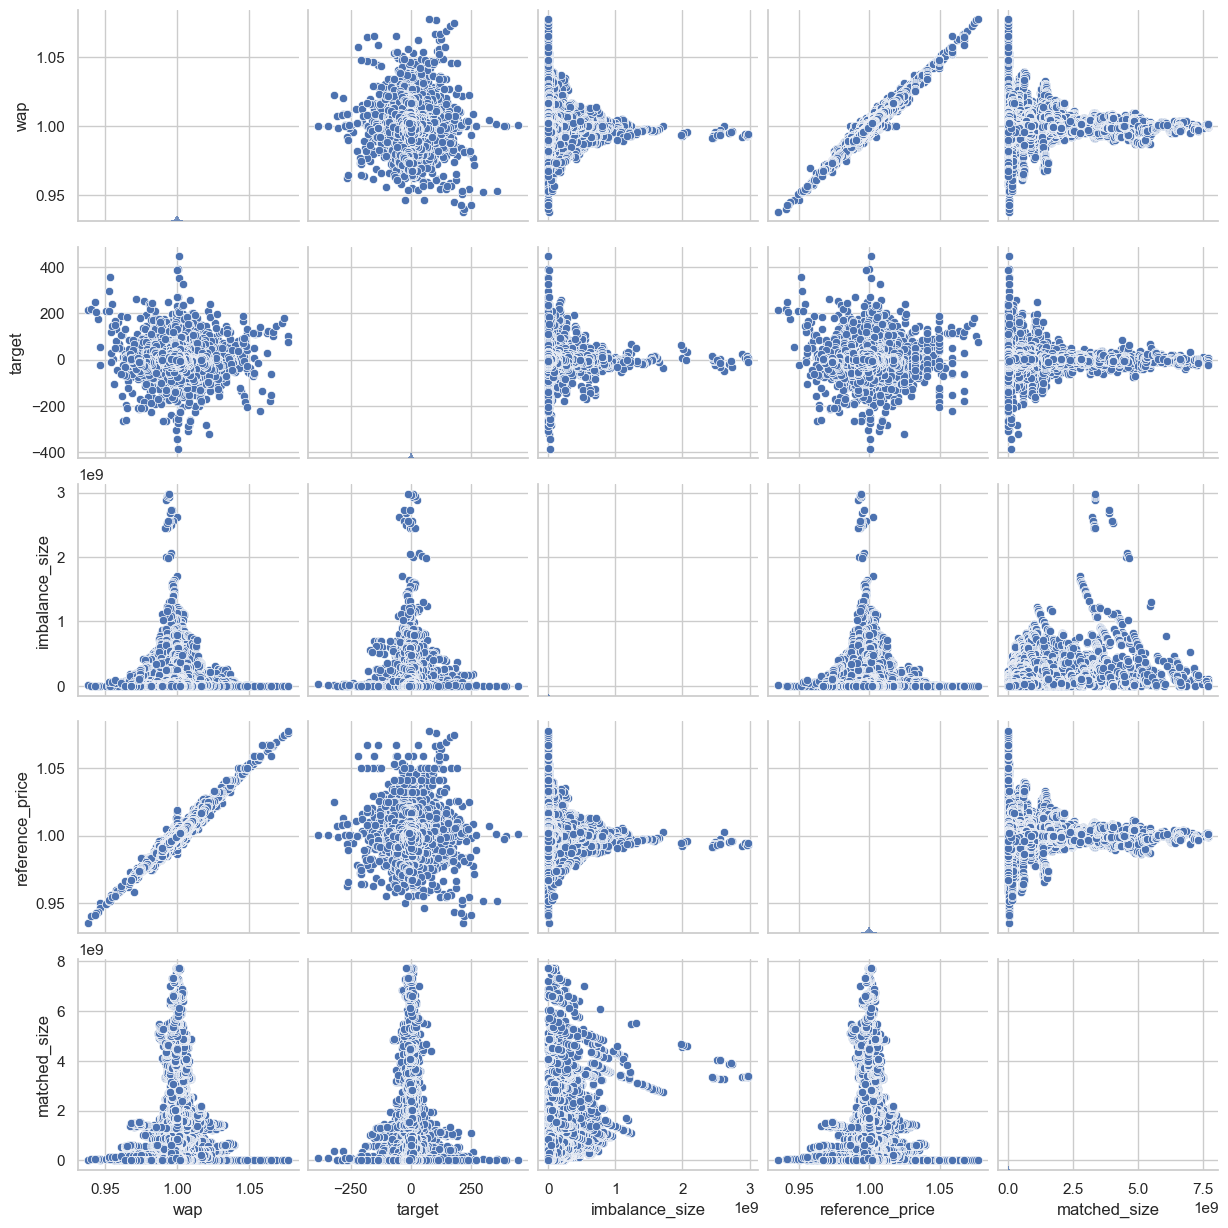

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

key_columns = ['wap', 'target']

fig, axes = plt.subplots(len(key_columns), 1, figsize=(15, 10), sharex=True)

for i, col in enumerate(key_columns):
    sns.lineplot(data=data, x='seconds_in_bucket', y=col, ax=axes[i])
    axes[i].set_title(f'Time Series of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Seconds in Bucket')

plt.tight_layout()
plt.show()

sns.pairplot(data=data[key_columns + ['imbalance_size', 'reference_price', 'matched_size']])
plt.show()

There is a clear positive correlation between wap and reference_price.

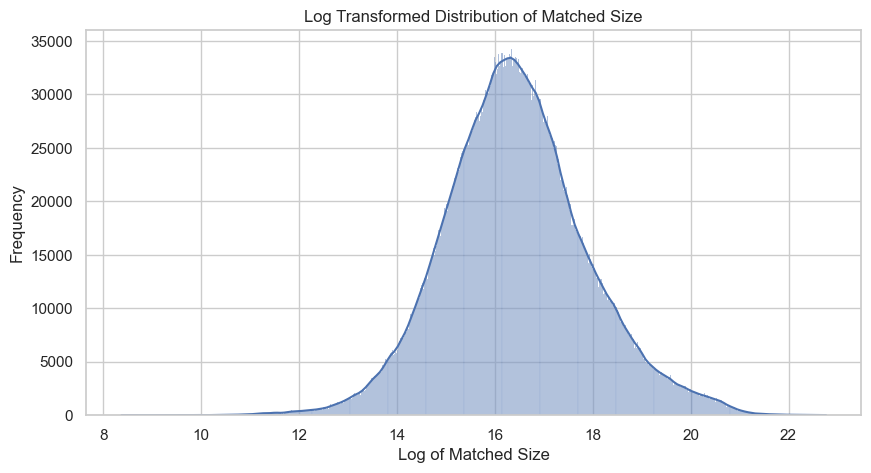

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(np.log1p(data['matched_size']), ax=ax, kde=True)
ax.set_title('Log Transformed Distribution of Matched Size')
ax.set_xlabel('Log of Matched Size')
ax.set_ylabel('Frequency')

plt.show()

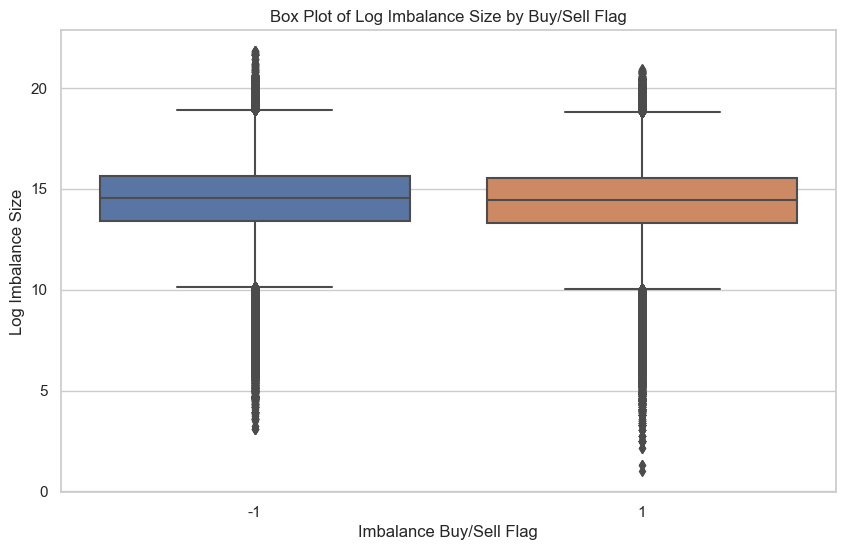

-1    2084349
 1    2022037
 0    1131594
Name: imbalance_buy_sell_flag, dtype: int64


In [11]:
filtered_data = data[data['imbalance_buy_sell_flag'] != 0]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='imbalance_buy_sell_flag', y=np.log1p(filtered_data['imbalance_size']))
ax.set_title('Box Plot of Log Imbalance Size by Buy/Sell Flag')
ax.set_xlabel('Imbalance Buy/Sell Flag')
ax.set_ylabel('Log Imbalance Size')
plt.show()

imbalance_flag_counts = data['imbalance_buy_sell_flag'].value_counts()
print(imbalance_flag_counts)
